In [115]:
    import pandas as pd
    import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime

In [116]:
# Process 관련 변수
df_process_raw = pd.read_csv("/home/piai/aibd/bd_project/data/bat_process.csv", encoding='euc-kr', low_memory=False)
# 시간 관련 변수
df_tat_raw = pd.read_csv("/home/piai/aibd/bd_project/data/bat_tat.csv", encoding='euc-kr', low_memory=False)
df_process_raw.head()

,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,37연,04단,3759.3,5,6.8,4718,37583,94,565,164
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,37연,04단,3758.4,5,6.8,4718,37574,94,565,73
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,37연,04단,3759,5.1,6.9,4700,37579,91,585,-57
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,37연,04단,3759.5,5.1,6.9,4688,37583,93,606,99
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,37연,04단,3758.2,5,6.8,4696,37570,91,605,36


In [42]:
df_process_id = df_process_raw.loc[:, ['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge']]
df_process_id.head()

,lot_id,tray_id,dt_start,cell_id,judge
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품


In [45]:
df_tat_id = df_tat_raw.loc[:, ['lot_id', 'tray_id', 'dt_start', 'cell_id']]
df_tat_id.head()

,lot_id,tray_id,dt_start,cell_id
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751


# Data 정제

## Aging

## Formation

### Charge #01, Discharge #01

In [304]:
df_filter_c1 = df_process_raw.filter(regex='c1_')
df_process_c1 = pd.concat([df_process_id, df_filter_c1], axis=1)
df_process_c1 = df_process_c1.drop(['pc1_imp', 'pc1_voltage_start', 'pc1_curr_end', 'pc1_box_col',
       'pc1_box_dan'], axis=1)
df_process_c1.head()

,lot_id,tray_id,dt_start,cell_id,judge,c1_curr_end,c1_voltage_avg,c1_capa,c1_ccval,c1_time_cc,c1_box_col,c1_box_dan,c1_temp_avg,dc1_curr_end,dc1_voltage_avg,dc1_capa,dc1_box_col,dc1_box_dan,dc1_temp_avg,dc1_capafit
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,6801,3781,6451,6451,3417,22열,08단,268,6799,4108,544,22열,08단,266,539
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,6797,3783,6390,6390,3385,22열,08단,268,6800,4103,545,22열,08단,266,540
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,6798,3781,6436,6436,3410,22열,08단,268,6799,4107,544,22열,08단,266,539
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,6799,3781,6474,6474,3430,22열,08단,268,6800,4108,545,22열,08단,266,540
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,6799,3780,6486,6486,3436,22열,08단,268,6798,4110,544,22열,08단,266,539


In [305]:
df_process_c1.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge', 'c1_curr_end',
       'c1_voltage_avg', 'c1_capa', 'c1_ccval', 'c1_time_cc', 'c1_box_col',
       'c1_box_dan', 'c1_temp_avg', 'dc1_curr_end', 'dc1_voltage_avg',
       'dc1_capa', 'dc1_box_col', 'dc1_box_dan', 'dc1_temp_avg',
       'dc1_capafit'],
      dtype='object')

In [306]:
df_process_c1['dc1_capa'].unique()

array([544, 545])

#### 이상치 확인

<AxesSubplot:>

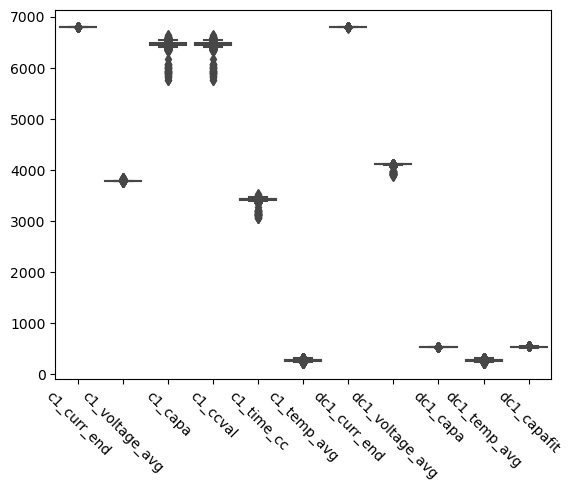

In [184]:
plt.xticks(rotation=-45)
sns.boxplot(data=df_process_c1)

"""
sns.boxplot(data=df_process_c1['dc1_voltage_avg'])
sns.boxplot(data=df_process_c1.loc[:, ['c1_capa', 'c1_ccval']])
sns.boxplot(data=df_process_c1.filter(regex='_voltage_avg'))
"""

<AxesSubplot:>

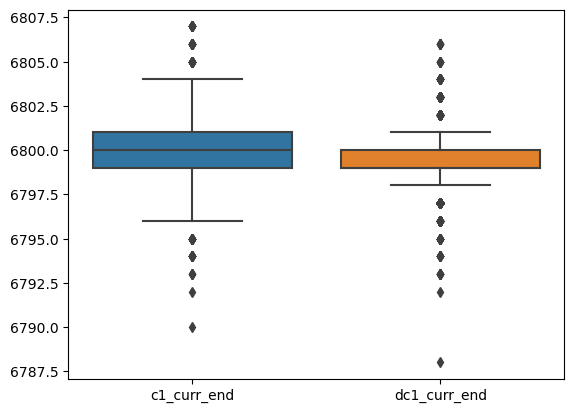

In [176]:
# 'c1_curr_end', 'dc1_curr_end'
sns.boxplot(data=df_process_c1.filter(regex='_curr_end'))

<AxesSubplot:>

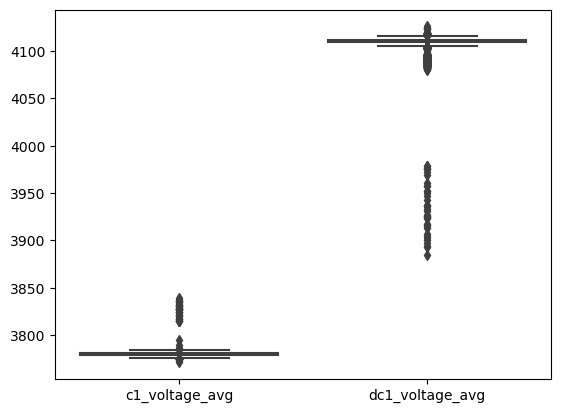

In [174]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c1.filter(regex='_voltage_avg'))

<AxesSubplot:>

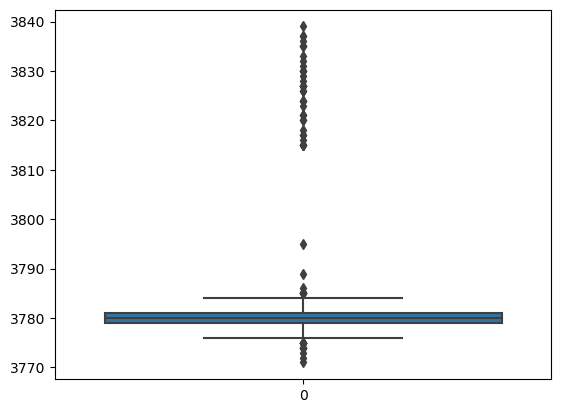

In [246]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c1['c1_voltage_avg'])

<AxesSubplot:>

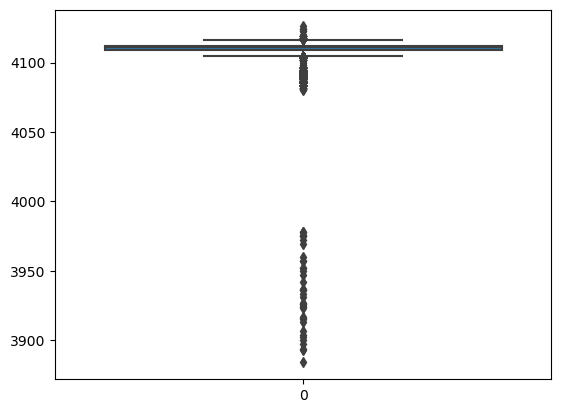

In [170]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c1['dc1_voltage_avg'])

<AxesSubplot:>

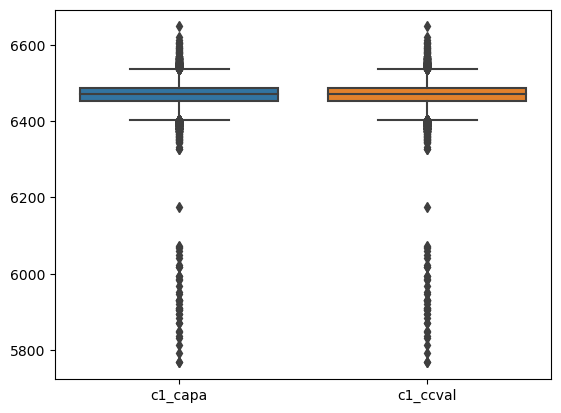

In [185]:
# 'c1_capa', 'c1_ccval'
sns.boxplot(data=df_process_c1.loc[:, ['c1_capa', 'c1_ccval']])

<AxesSubplot:>

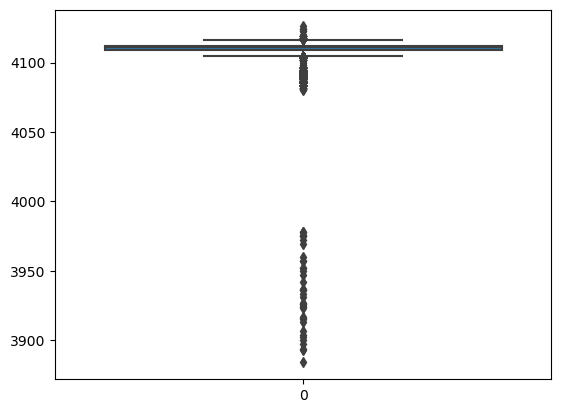

In [187]:
# 'c1_time_cc'
sns.boxplot(data=df_process_c1['dc1_voltage_avg'])

<AxesSubplot:>

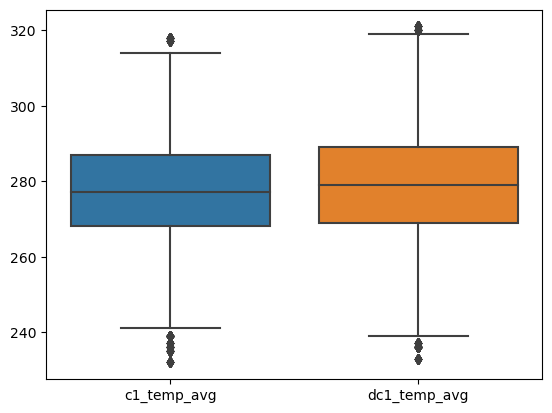

In [189]:
# 'c1_temp_avg', 'dc1_temp_avg'
sns.boxplot(data=df_process_c1.filter(regex='temp_avg'))

<AxesSubplot:>

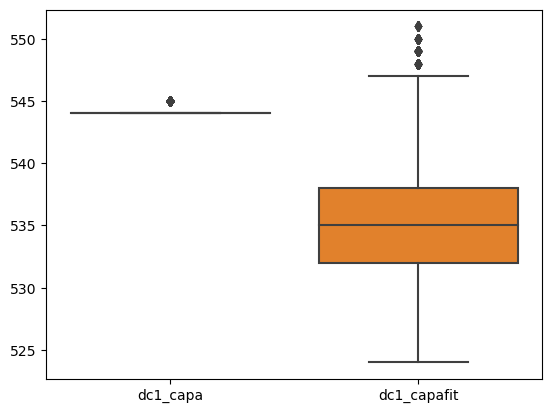

In [247]:
# 'dc1_capa','dc1_capafit'
sns.boxplot(data=df_process_c1.loc[:, ['dc1_capa', 'dc1_capafit']])

<AxesSubplot:>

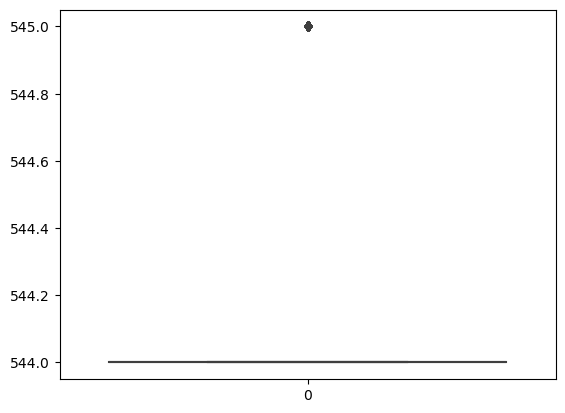

In [249]:
sns.boxplot(data=df_process_c2['dc2_capa'])

In [217]:
print(df_process_c1['c1_box_col'].unique())
print(df_process_c1['c1_box_dan'].unique())
print(df_process_c1['dc1_box_col'].unique())
print(df_process_c1['dc1_box_dan'].unique())

['22열' '21열' '11열' '16열' '14열' '01열' '10열' '19열' '05열' '03열' '06열' '17열'
 '09열' '18열' '20열' '04열' '13열' '12열' '15열' '07열' '02열' '08열']
['08단' '11단' '06단' '02단' '10단' '09단' '05단' '04단' '07단' '01단' '03단']
['22열' '21열' '11열' '16열' '14열' '01열' '10열' '19열' '05열' '03열' '06열' '17열'
 '09열' '18열' '20열' '04열' '13열' '12열' '15열' '07열' '02열' '08열']
['08단' '11단' '06단' '02단' '10단' '09단' '05단' '04단' '07단' '01단' '03단']


In [222]:
print(df_process_c1['c1_box_col'].value_counts())
print(df_process_c1['c1_box_dan'].value_counts())
print(df_process_c1['dc1_box_col'].value_counts())
print(df_process_c1['dc1_box_dan'].value_counts())

22열    2955
19열    2269
20열    2267
11열    2192
13열    2121
07열    2116
02열    2099
14열    2097
21열    2046
12열    2027
08열    2023
17열    1973
16열    1969
18열    1932
10열    1915
01열    1884
09열    1867
06열    1819
15열    1709
03열    1705
05열    1570
04열    1199
Name: c1_box_col, dtype: int64
04단    4782
05단    4711
07단    4708
02단    4266
06단    4151
03단    4045
11단    3964
08단    3813
09단    3768
10단    3688
01단    1858
Name: c1_box_dan, dtype: int64
22열    2955
19열    2269
20열    2267
11열    2192
13열    2121
07열    2116
02열    2099
14열    2097
21열    2046
12열    2027
08열    2023
17열    1973
16열    1969
18열    1932
10열    1915
01열    1884
09열    1867
06열    1819
15열    1709
03열    1705
05열    1570
04열    1199
Name: dc1_box_col, dtype: int64
04단    4782
05단    4711
07단    4708
02단    4266
06단    4151
03단    4045
11단    3964
08단    3813
09단    3768
10단    3688
01단    1858
Name: dc1_box_dan, dtype: int64


In [203]:
df_process_c1['c1_box_col'].head()

0    22열
1    22열
2    22열
3    22열
4    22열
Name: c1_box_col, dtype: object

### Charge #02, Discharge #02

In [307]:
df_filter_c2 = df_process_raw.filter(regex='c2_')
df_process_c2 = pd.concat([df_process_id, df_filter_c2], axis=1)
df_process_c2.head()

,lot_id,tray_id,dt_start,cell_id,judge,c2_curr_end,c2_voltage_avg,c2_capa,c2_ccval,c2_time_cc,c2_box_col,c2_box_dan,c2_temp_avg,dc2_curr_end,dc2_voltage_avg,dc2_capa,dc2_box_col,dc2_box_dan,dc2_temp_avg,dc2_capafit
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,6800,4146,625,625,332,22열,08단,265,6799,4112,544,22열,08단,266,539
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,6802,4144,657,657,349,22열,08단,265,6800,4110,544,22열,08단,266,539
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,6801,4146,630,630,335,22열,08단,265,6799,4111,544,22열,08단,266,539
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,6801,4146,627,627,333,22열,08단,265,6799,4111,544,22열,08단,266,539
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,6800,4147,613,613,326,22열,08단,265,6799,4112,544,22열,08단,266,539


In [308]:
df_filter_tat_c2 = df_tat_raw.filter(regex='c2_')
df_tat_c2 = pd.concat([df_tat_id, df_filter_tat_c2], axis=1)
df_tat_c2.head()

,lot_id,tray_id,dt_start,cell_id,c2_tat,dc2_tat
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,466,404
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,466,404
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,466,404
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,466,404
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,466,404


In [297]:
df_process_c2.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge', 'c2_curr_end',
       'c2_voltage_avg', 'c2_capa', 'c2_ccval', 'c2_time_cc', 'c2_box_col',
       'c2_box_dan', 'c2_temp_avg', 'dc2_curr_end', 'dc2_voltage_avg',
       'dc2_capa', 'dc2_box_col', 'dc2_box_dan', 'dc2_temp_avg',
       'dc2_capafit'],
      dtype='object')

In [309]:
df_process_c2['dc2_capa'].unique()

array([544, 545])

#### 이상치 확인

"\nsns.boxplot(data=df_process_c1['dc1_voltage_avg'])\nsns.boxplot(data=df_process_c1.loc[:, ['c1_capa', 'c1_ccval']])\nsns.boxplot(data=df_process_c1.filter(regex='_voltage_avg'))\n"

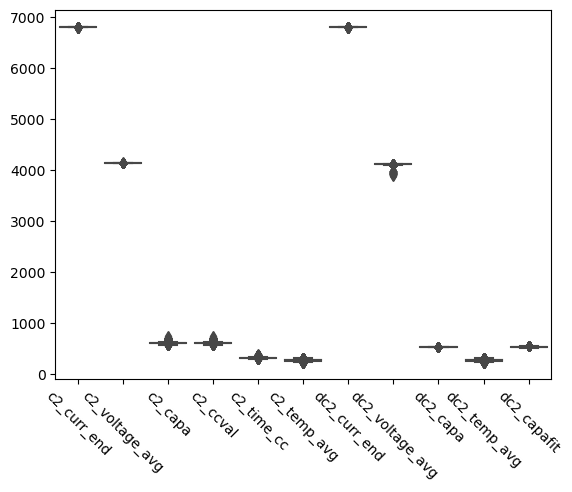

In [228]:
plt.xticks(rotation=-45)
sns.boxplot(data=df_process_c2)

"""
sns.boxplot(data=df_process_c1['dc1_voltage_avg'])
sns.boxplot(data=df_process_c1.loc[:, ['c1_capa', 'c1_ccval']])
sns.boxplot(data=df_process_c1.filter(regex='_voltage_avg'))
"""

<AxesSubplot:>

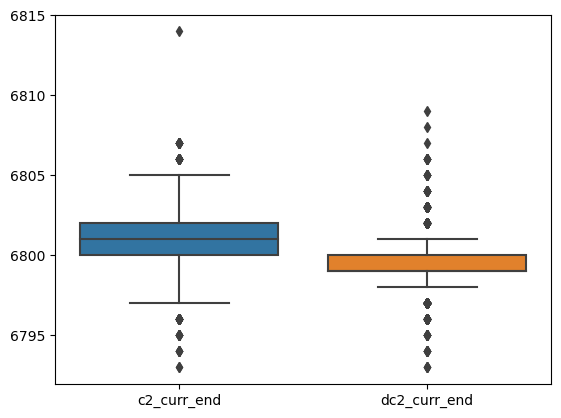

In [229]:
# 'c1_curr_end', 'dc1_curr_end'
sns.boxplot(data=df_process_c2.filter(regex='_curr_end'))

<AxesSubplot:>

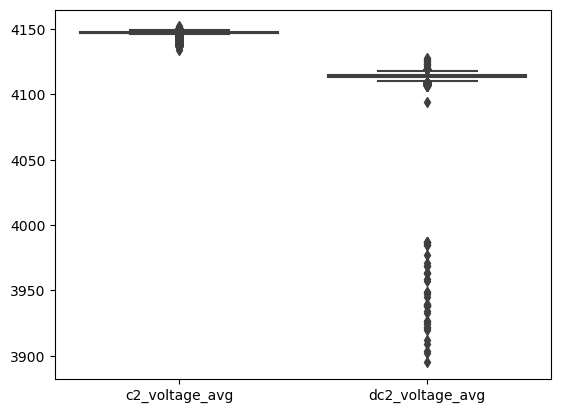

In [231]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c2.filter(regex='_voltage_avg'))

<AxesSubplot:>

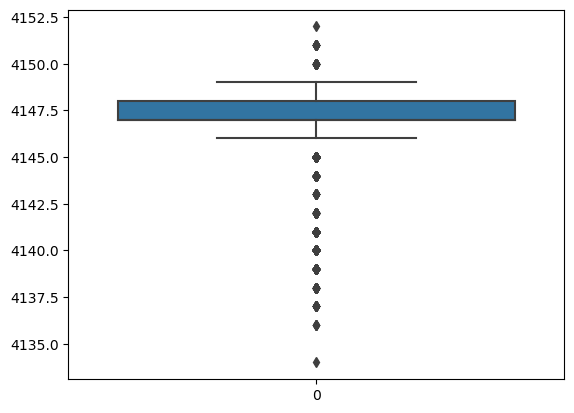

In [233]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c2['c2_voltage_avg'])

<AxesSubplot:>

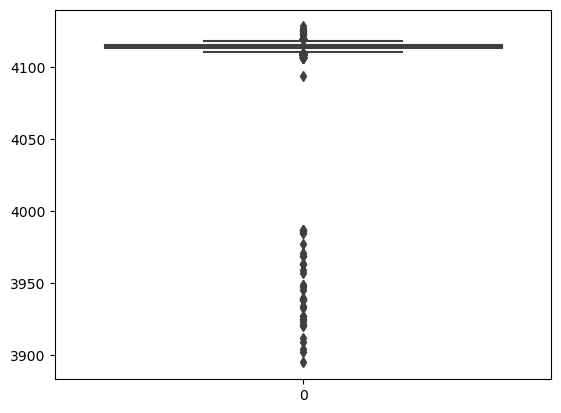

In [234]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c2['dc2_voltage_avg'])

<AxesSubplot:>

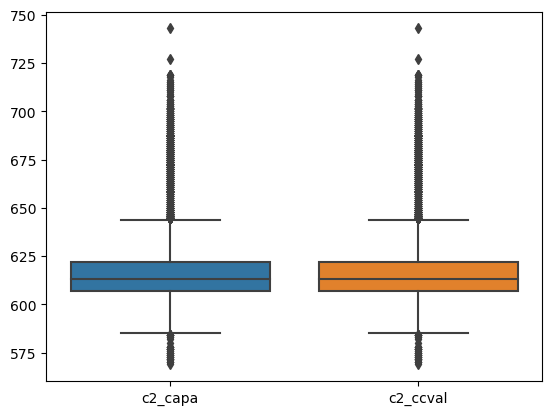

In [236]:
# 'c1_capa', 'c1_ccval'
sns.boxplot(data=df_process_c2.loc[:, ['c2_capa', 'c2_ccval']])

<AxesSubplot:>

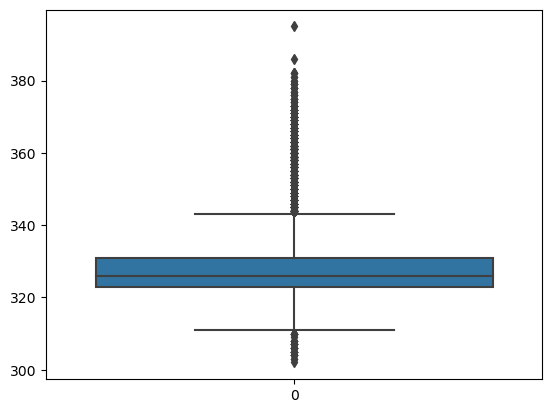

In [238]:
# 'c1_time_cc'
sns.boxplot(data=df_process_c2['c2_time_cc'])

<AxesSubplot:>

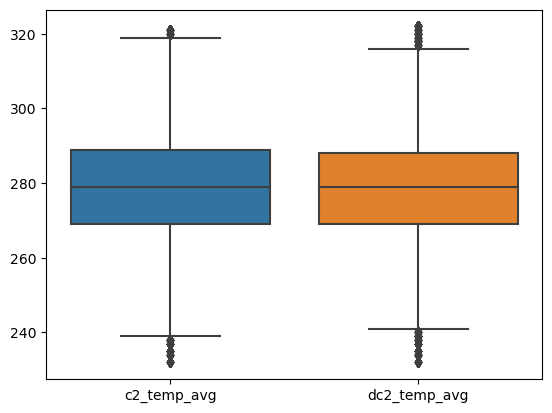

In [239]:
# 'c1_temp_avg', 'dc1_temp_avg'
sns.boxplot(data=df_process_c2.filter(regex='temp_avg'))

<AxesSubplot:>

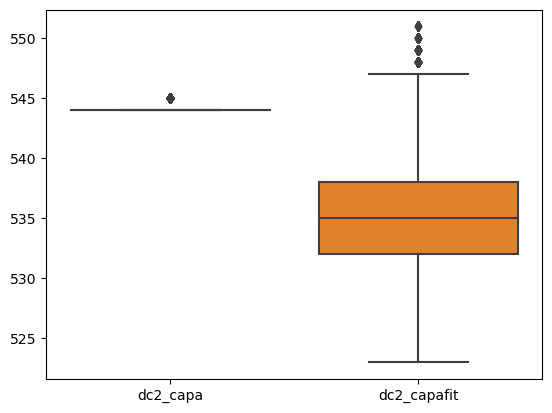

In [241]:
# 'dc1_capa','dc1_capafit'
sns.boxplot(data=df_process_c2.loc[:, ['dc2_capa', 'dc2_capafit']])

In [242]:
df_process_c2.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge', 'c2_curr_end',
       'c2_voltage_avg', 'c2_capa', 'c2_ccval', 'c2_time_cc', 'c2_box_col',
       'c2_box_dan', 'c2_temp_avg', 'dc2_curr_end', 'dc2_voltage_avg',
       'dc2_capa', 'dc2_box_col', 'dc2_box_dan', 'dc2_temp_avg',
       'dc2_capafit'],
      dtype='object')

In [243]:
print(df_process_c2['c2_box_col'].unique())
print(df_process_c2['c2_box_dan'].unique())
print(df_process_c2['dc2_box_col'].unique())
print(df_process_c2['dc2_box_dan'].unique())

['22열' '21열' '11열' '16열' '14열' '01열' '10열' '19열' '05열' '03열' '06열' '17열'
 '09열' '18열' '20열' '04열' '13열' '12열' '15열' '07열' '02열' '08열']
['08단' '11단' '06단' '02단' '10단' '09단' '05단' '04단' '07단' '01단' '03단']
['22열' '21열' '11열' '16열' '14열' '01열' '10열' '19열' '05열' '03열' '06열' '17열'
 '09열' '18열' '20열' '04열' '13열' '12열' '15열' '07열' '02열' '08열']
['08단' '11단' '06단' '02단' '10단' '09단' '05단' '04단' '07단' '01단' '03단']


In [245]:
print(df_process_c2['c2_box_col'].value_counts())
print(df_process_c2['c2_box_dan'].value_counts())
print(df_process_c2['dc2_box_col'].value_counts())
print(df_process_c2['dc2_box_dan'].value_counts())

22열    2955
19열    2269
20열    2267
11열    2192
13열    2121
07열    2116
02열    2099
14열    2097
21열    2046
12열    2027
08열    2023
17열    1973
16열    1969
18열    1932
10열    1915
01열    1884
09열    1867
06열    1819
15열    1709
03열    1705
05열    1570
04열    1199
Name: c2_box_col, dtype: int64
04단    4782
05단    4711
07단    4708
02단    4266
06단    4151
03단    4045
11단    3964
08단    3813
09단    3768
10단    3688
01단    1858
Name: c2_box_dan, dtype: int64
22열    2955
19열    2269
20열    2267
11열    2192
13열    2121
07열    2116
02열    2099
14열    2097
21열    2046
12열    2027
08열    2023
17열    1973
16열    1969
18열    1932
10열    1915
01열    1884
09열    1867
06열    1819
15열    1709
03열    1705
05열    1570
04열    1199
Name: dc2_box_col, dtype: int64
04단    4782
05단    4711
07단    4708
02단    4266
06단    4151
03단    4045
11단    3964
08단    3813
09단    3768
10단    3688
01단    1858
Name: dc2_box_dan, dtype: int64


In [203]:
df_process_c1['c1_box_col'].head()

0    22열
1    22열
2    22열
3    22열
4    22열
Name: c1_box_col, dtype: object

#### 결측치 확인

In [25]:
df_process_c2.isnull().sum()

lot_id             0
tray_id            0
dt_start           0
cell_id            0
judge              0
c2_curr_end        0
c2_voltage_avg     0
c2_capa            0
c2_ccval           0
c2_time_cc         0
c2_box_col         0
c2_box_dan         0
c2_temp_avg        0
dc2_curr_end       0
dc2_voltage_avg    0
dc2_capa           0
dc2_box_col        0
dc2_box_dan        0
dc2_temp_avg       0
dc2_capafit        0
dtype: int64

#### 시계열 분석

In [75]:
#df_process_c2['dt_start'] = pd.to_datetime(df_process_c2['dt_start'], errors='coerse')
df_process_c2['dt_start']

0        12-01-2021 오전 10:01:25
1        12-01-2021 오전 10:01:25
2        12-01-2021 오전 10:01:25
3        12-01-2021 오전 10:01:25
4        12-01-2021 오전 10:01:25
                  ...          
43749     12-17-2021 오후 6:33:15
43750     12-17-2021 오후 6:33:15
43751     12-17-2021 오후 6:33:15
43752     12-17-2021 오후 6:33:15
43753     12-17-2021 오후 6:33:15
Name: dt_start, Length: 43754, dtype: object

In [80]:
from datetime import datetime
import time

datetime_string = df_process_c2['dt_start']
datetime_format = "%Y-%m-%d %p %H:%M:%s"

datetime_result = datetime.strptime(datetime_string, datetime_format)
print(type(datetime_result)) # <class 'datetime.datetime'>
print(datetime_result) # 2021-12-31 13:35:42.657813

time_result = time.strptime(datetime_string, datetime_format)
print(type(time_result))  # <class 'time.struct_time'>
print(time_result)  # time.struct_time(tm_year=2021, tm_mon=12, tm_mday=31, tm_hour=13, tm_min=35, tm_sec=42, tm_wday=4, tm_yday=365, tm_isdst=-1)

AttributeError: 'str' object has no attribute 'strftime'

In [101]:
def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert, "%m-%d-%Y %c %H:%M:%S").strftime('%Y-%m-%d %p %H:%M:%s')

df_process_c2['dt_start'] = df_process_c2['dt_start'].apply(date_convert)

error: redefinition of group name 'd' as group 6; was group 2 at position 185

In [111]:
convert_datetime = datetime.strptime("12-01-2021 PM 10:01:25", '%Y-%m-%d %p %H:%M:%s')
convert_datetime

ValueError: 's' is a bad directive in format '%Y-%m-%d %p %H:%M:%s'

In [88]:
df_process_c2['dt_start'].head()

0    12-01-2021 오전 10:01:25
1    12-01-2021 오전 10:01:25
2    12-01-2021 오전 10:01:25
3    12-01-2021 오전 10:01:25
4    12-01-2021 오전 10:01:25
Name: dt_start, dtype: object

In [69]:
#df_process_c2['dt_start'] = df_process_c2['dt_start'].str.replace('오전','AM', regex=True).replace('오후','PM', regex=True)
df_process_c2[df_process_c2['dt_start'].str.contains('오전')].replace('')
for i in df_process_c2[(df_process_c2['dt_start'])]
df_process_c2['dt_start']



for i in df[(df['X'] == 1) & (df['Y'].notnull())].index:
        df.at[i, 'Y'] = 9

0        12-01-2021 AM 10:01:25
1        12-01-2021 AM 10:01:25
2        12-01-2021 AM 10:01:25
3        12-01-2021 AM 10:01:25
4        12-01-2021 AM 10:01:25
                  ...          
43749     12-17-2021 PM 6:33:15
43750     12-17-2021 PM 6:33:15
43751     12-17-2021 PM 6:33:15
43752     12-17-2021 PM 6:33:15
43753     12-17-2021 PM 6:33:15
Name: dt_start, Length: 43754, dtype: object

In [70]:
df_process_c2['dt_start'] = df_process_c2['dt_start'].astype('datetime64[ns]')

ParserError: Unknown string format: 12-01-2021 AM 10:01:25

In [39]:
df_process_c2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43754 entries, 0 to 43753
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   lot_id           43754 non-null  object
 1   tray_id          43754 non-null  object
 2   dt_start         43754 non-null  object
 3   cell_id          43754 non-null  object
 4   judge            43754 non-null  object
 5   c2_curr_end      43754 non-null  int64 
 6   c2_voltage_avg   43754 non-null  int64 
 7   c2_capa          43754 non-null  int64 
 8   c2_ccval         43754 non-null  int64 
 9   c2_time_cc       43754 non-null  int64 
 10  c2_box_col       43754 non-null  object
 11  c2_box_dan       43754 non-null  object
 12  c2_temp_avg      43754 non-null  int64 
 13  dc2_curr_end     43754 non-null  int64 
 14  dc2_voltage_avg  43754 non-null  int64 
 15  dc2_capa         43754 non-null  int64 
 16  dc2_box_col      43754 non-null  object
 17  dc2_box_dan      43754 non-null

In [60]:
pd.to_datetime("2022-"+df_process_c2["dt_start"].str.replace(".","_"))

/tmp/ipykernel_32747/3938069217.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  pd.to_datetime("2022-"+df_process_c2["dt_start"].str.replace(".","_"))


ParserError: Unknown string format: 2022-12-01-2021 am 10:01:25

In [71]:
#df_process_c2['dt_start'] = pd.to_datetime(df_process_c2['dt_start'])
df_process_c2['dt_start'] = df_process_c2['dt_start'].apply(pd.to_datetime)

ParserError: Unknown string format: 12-01-2021 AM 10:01:25

In [112]:
df['MeasDate'] = pd.to_datetime(df['MeasDate'])
df_trend= pd.pivot_table(df, values = ['PM10','CO'] , index = ['MeasDate'], fill_value = 0)
df_trend['PM10'] = df_trend['PM10']*0.01
df_trend.head()
df_trend.plot()
plt.xlabel = 'MeasDate'
plt.ylabel = 'PM10'

NameError: name 'df' is not defined

In [113]:
df_process_raw

,lot_id,tray_id,dt_start,cell_id,judge,rta1_cell_no,rta1_box_col,rta1_box_row,rta1_box_dan,hta1_box_col,...,sa3_box_row,sa3_box_dan,socv3_ocv,ocv2_deltaocv,ocv1_deltaocv,m1_thick,m1_voltage,m1_res_ac,m1_mv,m1_voltage_an
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,10,08열,33연,08단,03열,...,37연,04단,3759.3,5,6.8,4718,37583,94,565,164
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,7,08열,33연,08단,03열,...,37연,04단,3758.4,5,6.8,4718,37574,94,565,73
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,19,08열,33연,08단,03열,...,37연,04단,3759,5.1,6.9,4700,37579,91,585,-57
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,24,08열,33연,08단,03열,...,37연,04단,3759.5,5.1,6.9,4688,37583,93,606,99
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,17,08열,33연,08단,03열,...,37연,04단,3758.2,5,6.8,4696,37570,91,605,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43749,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-53649,양품,16,08열,21연,03단,02열,...,16연,13단,3759.2,5.3,7.2,4745,37583,94,643,-35
43750,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-53650,양품,14,08열,21연,03단,02열,...,16연,13단,3759.2,5.3,7.1,4746,37583,94,620,89
43751,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-53651,양품,2,08열,21연,03단,02열,...,16연,13단,3760.3,5.2,7,4782,37595,92,597,-23
43752,LOT-144,TRAY-2791,12-17-2021 오후 6:33:15,CELL-54355,양품,15,08열,21연,03단,02열,...,16연,13단,3760,5.3,7,4751,37590,95,620,3


### Charge #03, Discharge #03

In [251]:
df_filter_c3 = df_process_raw.filter(regex='c3_')
df_process_c3 = pd.concat([df_process_id, df_filter_c3], axis=1)
df_process_c3.head()

,lot_id,tray_id,dt_start,cell_id,judge,c3_curr_end,c3_voltage_avg,c3_capa,c3_ccval,c3_time_cv,...,c3_box_col,c3_box_dan,c3_temp_avg,dc3_curr_end,dc3_voltage_avg,dc3_capa,dc3_box_col,dc3_box_dan,dc3_temp_avg,dc3_capafit
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,135,4189,749,578,1190,...,22열,08단,266,6796,3674,7094,22열,08단,269,7088
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,136,4189,768,588,1286,...,22열,08단,266,6799,3674,7091,22열,08단,269,7085
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,136,4189,753,579,1228,...,22열,08단,266,6799,3674,7079,22열,08단,269,7073
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,136,4190,765,583,1328,...,22열,08단,266,6796,3675,7106,22열,08단,269,7100
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,136,4187,733,575,980,...,22열,08단,266,6797,3674,7101,22열,08단,269,7095


In [252]:
df_filter_tat_c3 = df_tat_raw.filter(regex='c3_')
df_tat_c3 = pd.concat([df_tat_id, df_filter_tat_c3], axis=1)
df_tat_c3.head()

,lot_id,tray_id,dt_start,cell_id,c3_tat,dc3_tat
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,1797,3884
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,1797,3884
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,1797,3884
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,1797,3884
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,1797,3884


In [341]:
df_process_c3.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge', 'c3_curr_end',
       'c3_voltage_avg', 'c3_capa', 'c3_ccval', 'c3_time_cv', 'c3_cvval',
       'c3_time_cc', 'c3_box_col', 'c3_box_dan', 'c3_temp_avg', 'dc3_curr_end',
       'dc3_voltage_avg', 'dc3_capa', 'dc3_box_col', 'dc3_box_dan',
       'dc3_temp_avg', 'dc3_capafit'],
      dtype='object')

In [342]:
df_process_c3['c3_curr_end'].unique()

array([135, 136])

#### 이상치 확인

"\nsns.boxplot(data=df_process_c1['dc1_voltage_avg'])\nsns.boxplot(data=df_process_c1.loc[:, ['c1_capa', 'c1_ccval']])\nsns.boxplot(data=df_process_c1.filter(regex='_voltage_avg'))\n"

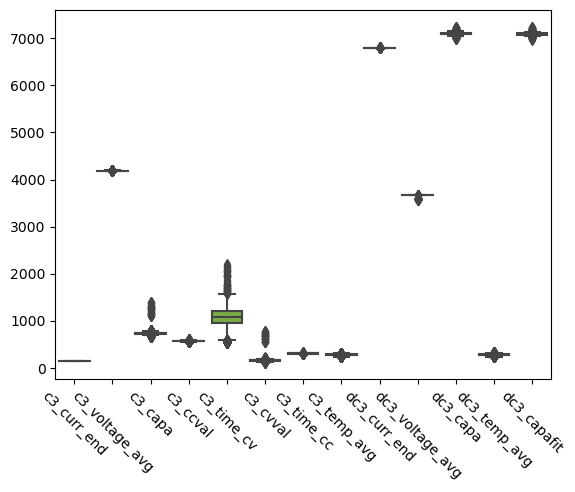

In [254]:
plt.xticks(rotation=-45)
sns.boxplot(data=df_process_c3)

"""
sns.boxplot(data=df_process_c1['dc1_voltage_avg'])
sns.boxplot(data=df_process_c1.loc[:, ['c1_capa', 'c1_ccval']])
sns.boxplot(data=df_process_c1.filter(regex='_voltage_avg'))
"""

<AxesSubplot:>

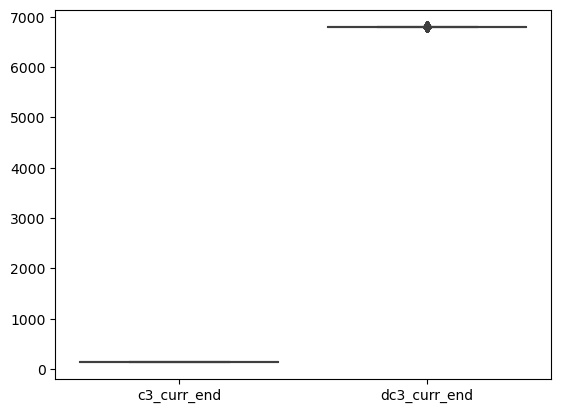

In [256]:
# 'c1_curr_end', 'dc1_curr_end'
sns.boxplot(data=df_process_c3.filter(regex='_curr_end'))

<AxesSubplot:>

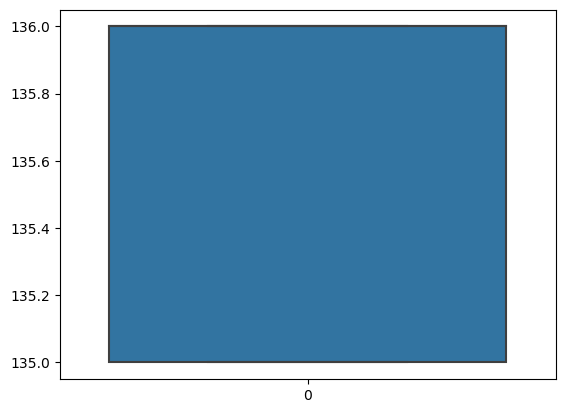

In [258]:
sns.boxplot(data=df_process_c3['c3_curr_end'])

<AxesSubplot:>

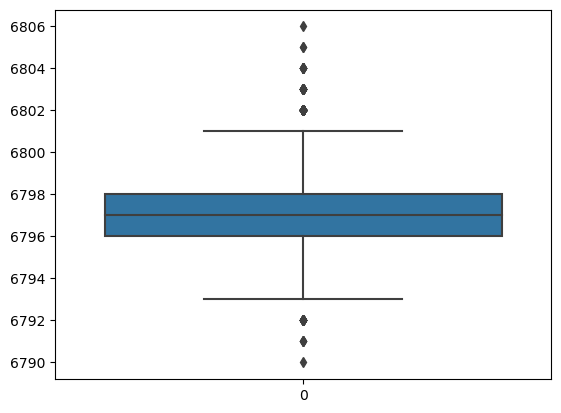

In [259]:
sns.boxplot(data=df_process_c3['dc3_curr_end'])

<AxesSubplot:>

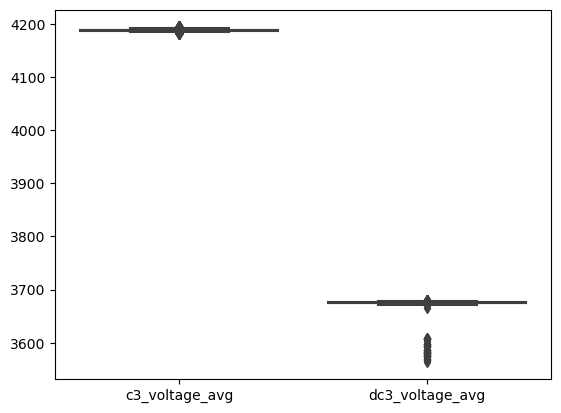

In [260]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c3.filter(regex='_voltage_avg'))

<AxesSubplot:>

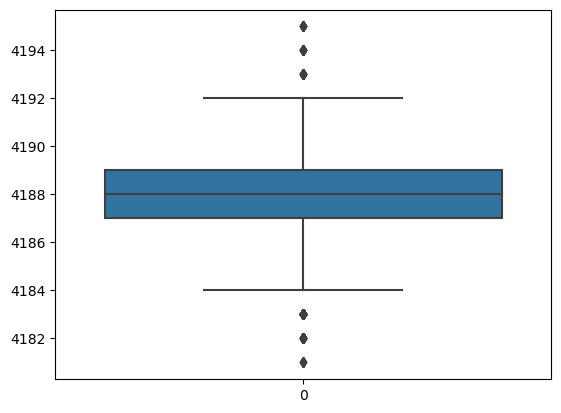

In [261]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c3['c3_voltage_avg'])

<AxesSubplot:>

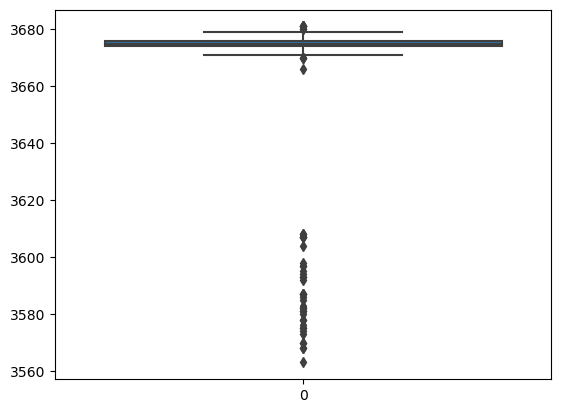

In [262]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c3['dc3_voltage_avg'])

<AxesSubplot:>

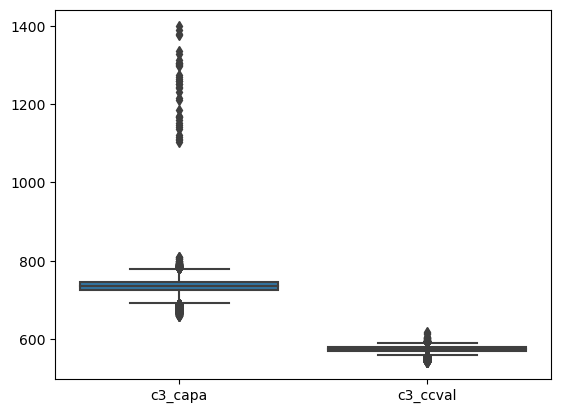

In [264]:
# 'c1_capa', 'c1_ccval'
sns.boxplot(data=df_process_c3.loc[:, ['c3_capa', 'c3_ccval']])

<AxesSubplot:>

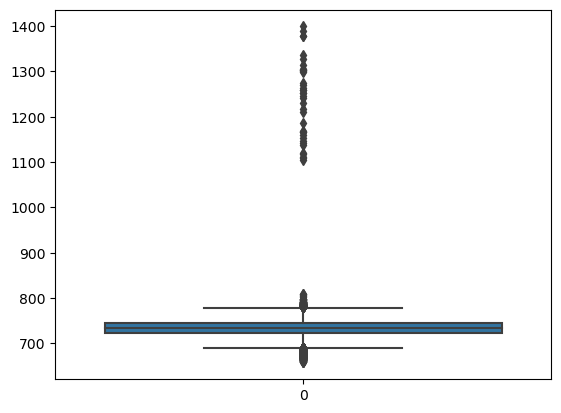

In [269]:
sns.boxplot(data=df_process_c3['c3_capa'])

<AxesSubplot:>

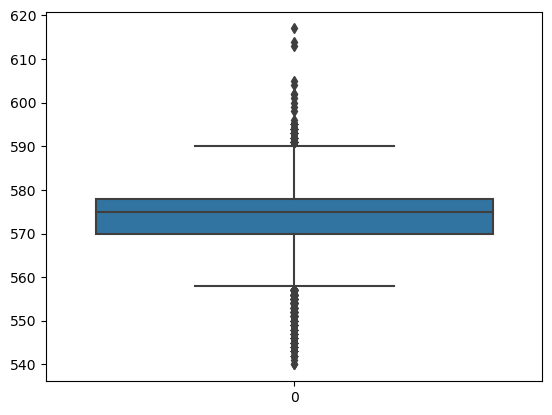

In [268]:
sns.boxplot(data=df_process_c3['c3_ccval'])

<AxesSubplot:>

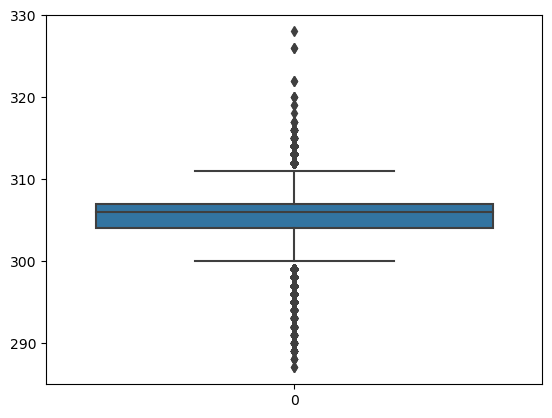

In [270]:
# 'c1_time_cc'
sns.boxplot(data=df_process_c3['c3_time_cc'])

<AxesSubplot:>

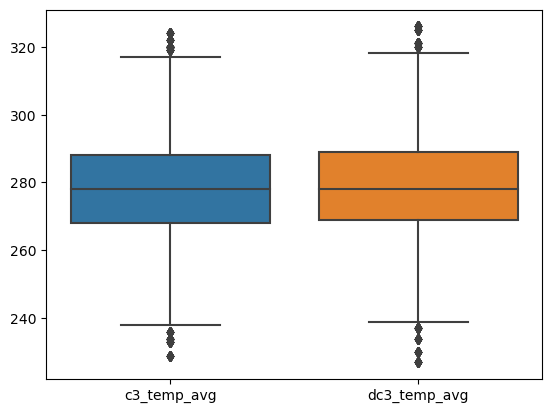

In [271]:
# 'c1_temp_avg', 'dc1_temp_avg'
sns.boxplot(data=df_process_c3.filter(regex='temp_avg'))

<AxesSubplot:>

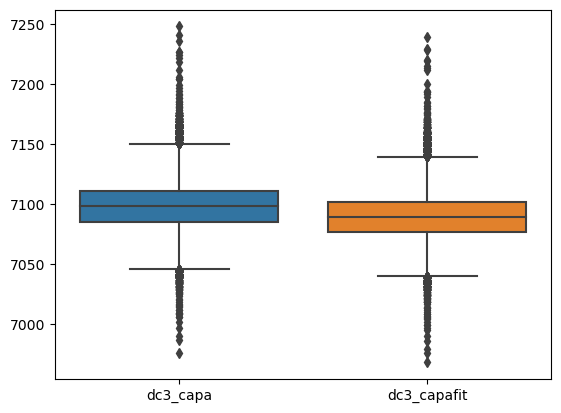

In [272]:
# 'dc1_capa','dc1_capafit'
sns.boxplot(data=df_process_c3.loc[:, ['dc3_capa', 'dc3_capafit']])

In [242]:
df_process_c2.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge', 'c2_curr_end',
       'c2_voltage_avg', 'c2_capa', 'c2_ccval', 'c2_time_cc', 'c2_box_col',
       'c2_box_dan', 'c2_temp_avg', 'dc2_curr_end', 'dc2_voltage_avg',
       'dc2_capa', 'dc2_box_col', 'dc2_box_dan', 'dc2_temp_avg',
       'dc2_capafit'],
      dtype='object')

In [243]:
print(df_process_c2['c2_box_col'].unique())
print(df_process_c2['c2_box_dan'].unique())
print(df_process_c2['dc2_box_col'].unique())
print(df_process_c2['dc2_box_dan'].unique())

['22열' '21열' '11열' '16열' '14열' '01열' '10열' '19열' '05열' '03열' '06열' '17열'
 '09열' '18열' '20열' '04열' '13열' '12열' '15열' '07열' '02열' '08열']
['08단' '11단' '06단' '02단' '10단' '09단' '05단' '04단' '07단' '01단' '03단']
['22열' '21열' '11열' '16열' '14열' '01열' '10열' '19열' '05열' '03열' '06열' '17열'
 '09열' '18열' '20열' '04열' '13열' '12열' '15열' '07열' '02열' '08열']
['08단' '11단' '06단' '02단' '10단' '09단' '05단' '04단' '07단' '01단' '03단']


In [245]:
print(df_process_c2['c2_box_col'].value_counts())
print(df_process_c2['c2_box_dan'].value_counts())
print(df_process_c2['dc2_box_col'].value_counts())
print(df_process_c2['dc2_box_dan'].value_counts())

22열    2955
19열    2269
20열    2267
11열    2192
13열    2121
07열    2116
02열    2099
14열    2097
21열    2046
12열    2027
08열    2023
17열    1973
16열    1969
18열    1932
10열    1915
01열    1884
09열    1867
06열    1819
15열    1709
03열    1705
05열    1570
04열    1199
Name: c2_box_col, dtype: int64
04단    4782
05단    4711
07단    4708
02단    4266
06단    4151
03단    4045
11단    3964
08단    3813
09단    3768
10단    3688
01단    1858
Name: c2_box_dan, dtype: int64
22열    2955
19열    2269
20열    2267
11열    2192
13열    2121
07열    2116
02열    2099
14열    2097
21열    2046
12열    2027
08열    2023
17열    1973
16열    1969
18열    1932
10열    1915
01열    1884
09열    1867
06열    1819
15열    1709
03열    1705
05열    1570
04열    1199
Name: dc2_box_col, dtype: int64
04단    4782
05단    4711
07단    4708
02단    4266
06단    4151
03단    4045
11단    3964
08단    3813
09단    3768
10단    3688
01단    1858
Name: dc2_box_dan, dtype: int64


In [203]:
df_process_c1['c1_box_col'].head()

0    22열
1    22열
2    22열
3    22열
4    22열
Name: c1_box_col, dtype: object

### Charge #04, Discharge #04

In [274]:
df_filter_c4 = df_process_raw.filter(regex='c4_')
df_process_c4 = pd.concat([df_process_id, df_filter_c4], axis=1)
df_process_c4.head()

,lot_id,tray_id,dt_start,cell_id,judge,c4_curr_end,c4_voltage_avg,c4_capa,c4_ccval,c4_time_cv,c4_cvval,c4_time_cc,c4_box_col,c4_box_dan,c4_temp_avg
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,양품,136,3629,4282,4072,1091,210,2157,22열,08단,273
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,양품,136,3624,4268,4064,969,204,2153,22열,08단,273
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,양품,136,3630,4270,4058,1112,212,2150,22열,08단,273
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,양품,136,3630,4304,4092,1129,212,2168,22열,08단,273
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,양품,136,3619,4286,4088,879,199,2166,22열,08단,273


In [275]:
df_filter_tat_c4 = df_tat_raw.filter(regex='c4_')
df_tat_c4 = pd.concat([df_tat_id, df_filter_tat_c4], axis=1)
df_tat_c4.head()

,lot_id,tray_id,dt_start,cell_id,c4_tat
0,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10747,3428
1,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10748,3428
2,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10749,3428
3,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10750,3428
4,LOT-100,TRAY-1023,12-01-2021 오전 10:01:25,CELL-10751,3428


In [276]:
df_process_c4.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge', 'c4_curr_end',
       'c4_voltage_avg', 'c4_capa', 'c4_ccval', 'c4_time_cv', 'c4_cvval',
       'c4_time_cc', 'c4_box_col', 'c4_box_dan', 'c4_temp_avg'],
      dtype='object')

#### 이상치 확인

"\nsns.boxplot(data=df_process_c1['dc1_voltage_avg'])\nsns.boxplot(data=df_process_c1.loc[:, ['c1_capa', 'c1_ccval']])\nsns.boxplot(data=df_process_c1.filter(regex='_voltage_avg'))\n"

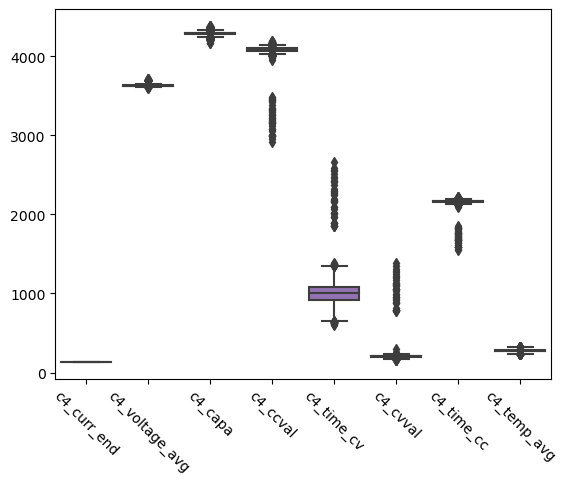

In [277]:
plt.xticks(rotation=-45)
sns.boxplot(data=df_process_c4)

"""
sns.boxplot(data=df_process_c1['dc1_voltage_avg'])
sns.boxplot(data=df_process_c1.loc[:, ['c1_capa', 'c1_ccval']])
sns.boxplot(data=df_process_c1.filter(regex='_voltage_avg'))
"""

<AxesSubplot:>

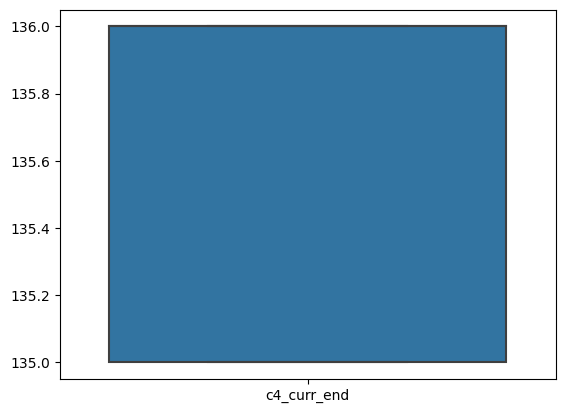

In [278]:
# 'c1_curr_end', 'dc1_curr_end'
sns.boxplot(data=df_process_c4.filter(regex='_curr_end'))

<AxesSubplot:>

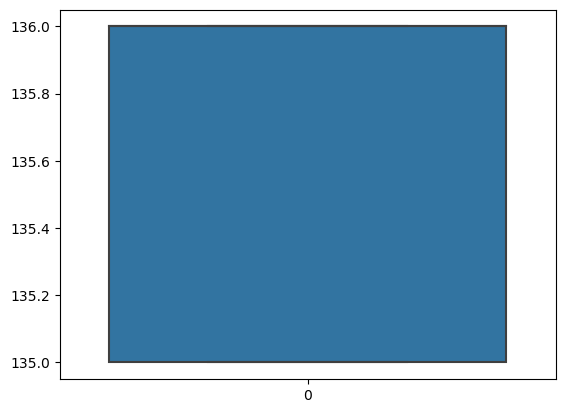

In [258]:
sns.boxplot(data=df_process_c3['c3_curr_end'])

<AxesSubplot:>

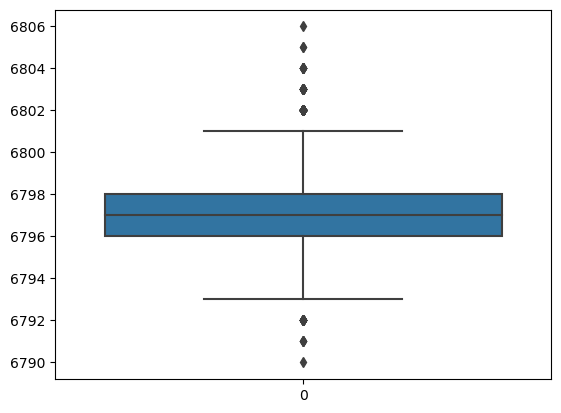

In [259]:
sns.boxplot(data=df_process_c3['dc3_curr_end'])

<AxesSubplot:>

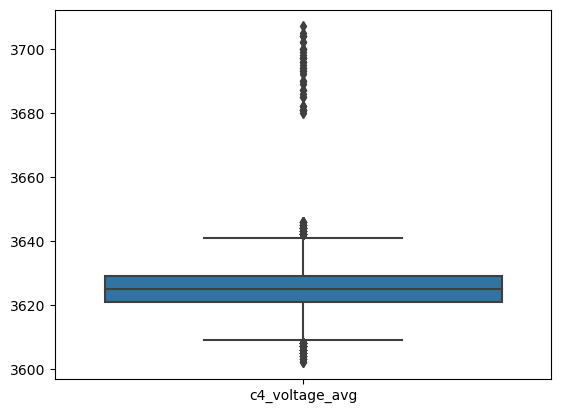

In [279]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c4.filter(regex='_voltage_avg'))

<AxesSubplot:>

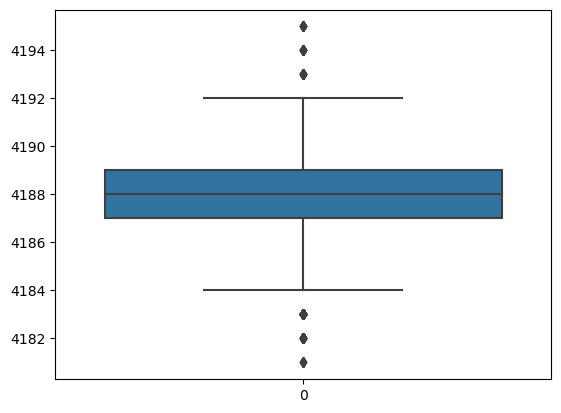

In [261]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c3['c3_voltage_avg'])

<AxesSubplot:>

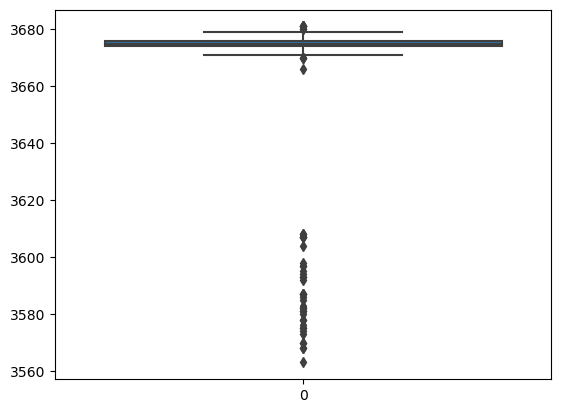

In [262]:
# 'c1_voltage_avg', 'dc1_voltage_avg'
sns.boxplot(data=df_process_c3['dc3_voltage_avg'])

<AxesSubplot:>

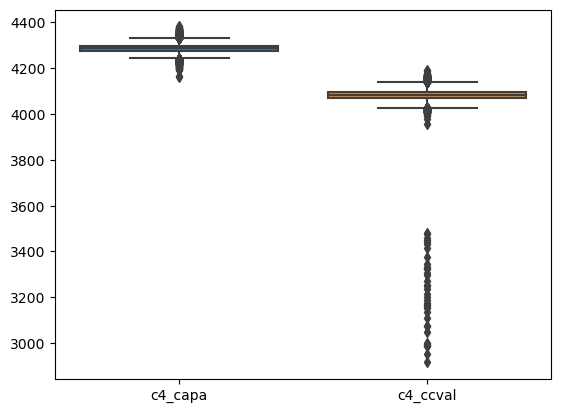

In [280]:
# 'c1_capa', 'c1_ccval'
sns.boxplot(data=df_process_c4.loc[:, ['c4_capa', 'c4_ccval']])

<AxesSubplot:>

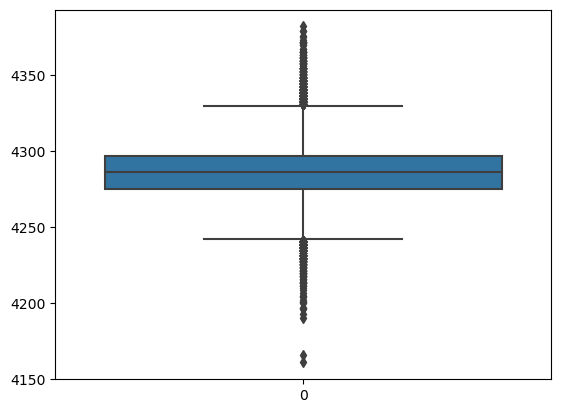

In [281]:
sns.boxplot(data=df_process_c4['c4_capa'])

<AxesSubplot:>

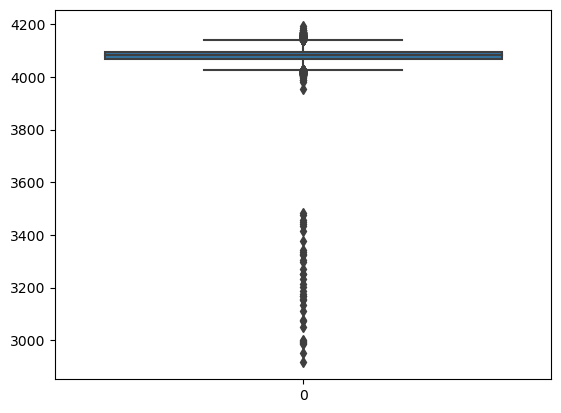

In [282]:
sns.boxplot(data=df_process_c4['c4_ccval'])

<AxesSubplot:>

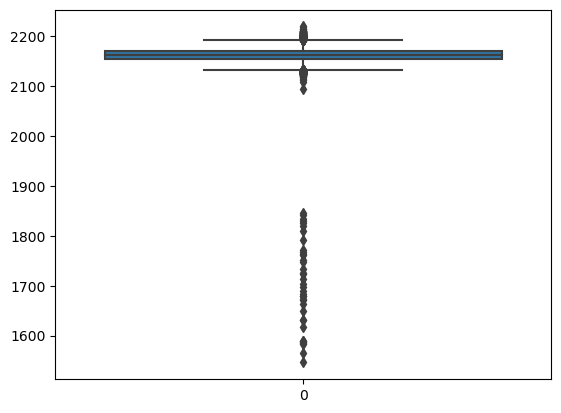

In [283]:
# 'c1_time_cc'
sns.boxplot(data=df_process_c4['c4_time_cc'])

<AxesSubplot:>

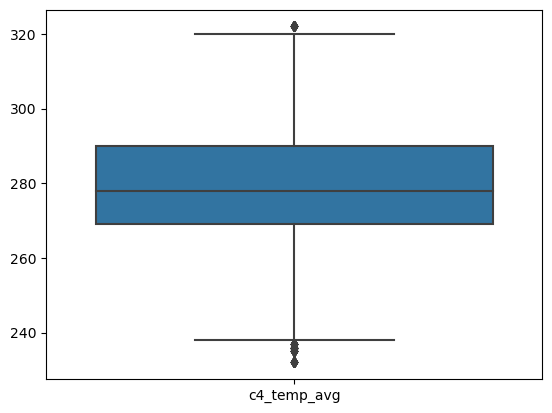

In [284]:
# 'c1_temp_avg', 'dc1_temp_avg'
sns.boxplot(data=df_process_c4.filter(regex='temp_avg'))

In [289]:
df_process_c4.columns

Index(['lot_id', 'tray_id', 'dt_start', 'cell_id', 'judge', 'c4_curr_end',
       'c4_voltage_avg', 'c4_capa', 'c4_ccval', 'c4_time_cv', 'c4_cvval',
       'c4_time_cc', 'c4_box_col', 'c4_box_dan', 'c4_temp_avg'],
      dtype='object')

In [291]:
print(df_process_c4['c4_box_col'].unique())
print(df_process_c4['c4_box_dan'].unique())

['22열' '21열' '11열' '16열' '14열' '01열' '10열' '19열' '05열' '03열' '06열' '17열'
 '09열' '18열' '20열' '04열' '13열' '12열' '15열' '07열' '02열' '08열']
['08단' '11단' '06단' '02단' '10단' '09단' '05단' '04단' '07단' '01단' '03단']


In [292]:
print(df_process_c4['c4_box_col'].value_counts())
print(df_process_c4['c4_box_dan'].value_counts())

22열    2955
19열    2269
20열    2267
11열    2192
13열    2121
07열    2116
02열    2099
14열    2097
21열    2046
12열    2027
08열    2023
17열    1973
16열    1969
18열    1932
10열    1915
01열    1884
09열    1867
06열    1819
15열    1709
03열    1705
05열    1570
04열    1199
Name: c4_box_col, dtype: int64
04단    4782
05단    4711
07단    4708
02단    4266
06단    4151
03단    4045
11단    3964
08단    3813
09단    3768
10단    3688
01단    1858
Name: c4_box_dan, dtype: int64


## Power Grading ~ 출하

# Utils

In [300]:
def GetDifferences(df1, df2):
  df = pd.concat([df1, df2]).reset_index(drop=True)
  idx = [diff[0] for diff in df.groupby(list(df.columns)).groups.values() if len(diff) == 1]
  return df.reindex(idx)

In [301]:
GetDifferences(df_process_c1['dc1_capafit'], df_process_c2['dc1_capafit'])

KeyError: 'dc1_capafit'

In [312]:
df_process_c1['dc1_capafit'].equals(df_process_c2['dc1_capafit'])

KeyError: 'dc1_capafit'

In [338]:
df_process_c1['dc1_capafit']

0        539
1        540
2        539
3        540
4        539
        ... 
43749    543
43750    542
43751    542
43752    542
43753    542
Name: dc1_capafit, Length: 43754, dtype: int64

In [339]:
df_diff1 = df_process_c1['dc1_capafit']
df_diff2 = df_process_c2['dc2_capafit']
df_diff = pd.concat([df_diff1, df_diff2], axis=1)
df_diff

,dc1_capafit,dc2_capafit
0,539,539
1,540,539
2,539,539
3,540,539
4,539,539
...,...,...
43749,543,542
43750,542,542
43751,542,542
43752,542,542


In [340]:
df_diff = df_diff.diff(axis=1)
df_diff['dc2_capafit'].unique()

array([ 0, -1,  1, -2,  2, -3,  3,  4,  5, -4, -5])